In [1]:
import scipy
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.geodesic as geodesic
Geodesic = geodesic.Geodesic()
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings   
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [2]:
m5 = xr.open_dataset('Meddy5.nc')
m5 = m5.swap_dims({'N_OBS':'dated'}).drop('N_OBS')
#Let's oversample a bit to try detect loops more precisely
m5 = m5.interp(dated=np.arange(m5.dated.min().values,m5.dated.max().values,dtype='datetime64[h]'))
m5 = m5.isel(dated=slice(1,-1,4))
m5

<xarray.Dataset> Size: 207kB
Dimensions:  (dated: 3232)
Coordinates:
  * dated    (dated) datetime64[ns] 26kB 1994-01-08T16:00:00 ... 1995-07-01T0...
Data variables:
    dtnum    (dated) float64 26kB 7.283e+05 7.283e+05 ... 7.288e+05 7.288e+05
    lat      (dated) float64 26kB 38.4 38.38 38.37 38.33 ... 30.93 30.94 30.94
    lon      (dated) float64 26kB -10.02 -9.983 -9.951 ... -15.79 -15.79 -15.8
    p        (dated) float64 26kB 929.4 929.0 928.6 928.3 ... 959.7 960.3 960.9
    t        (dated) float64 26kB 12.34 12.33 12.33 12.33 ... 9.49 9.48 9.475
    u        (dated) float64 26kB 0.1968 0.134 0.07116 ... -0.04802 -0.05547
    v        (dated) float64 26kB -0.1351 -0.1698 -0.2046 ... 0.0251 0.01834

In [3]:
az=np.zeros([len(m5.dated),len(m5.dated)])*np.nan
for i in np.arange(0,len(m5.dated)):
    #Entre 5 et 30 points 
    for j in np.arange(i+5,min(i+30,len(m5.dated))):
        a=Geodesic.inverse((m5.lon.isel(dated=i),m5.lat.isel(dated=i)),(m5.lon.isel(dated=j),m5.lat.isel(dated=j)))
        az[i,j]=a[0][0]

In [4]:
small_dist=np.argwhere(az<2500)
loops=small_dist[0,:]
last_loop=small_dist[0,:]
for i in np.arange(1,len(small_dist)):
    if small_dist[i,0]<last_loop[1]:
        pass
    else:
        loops=np.vstack([loops,small_dist[i,:]])
        last_loop=small_dist[i,:]

Text(0.5, 1.0, '1994-01-08 -->  1994-04-08 : 27 loops')

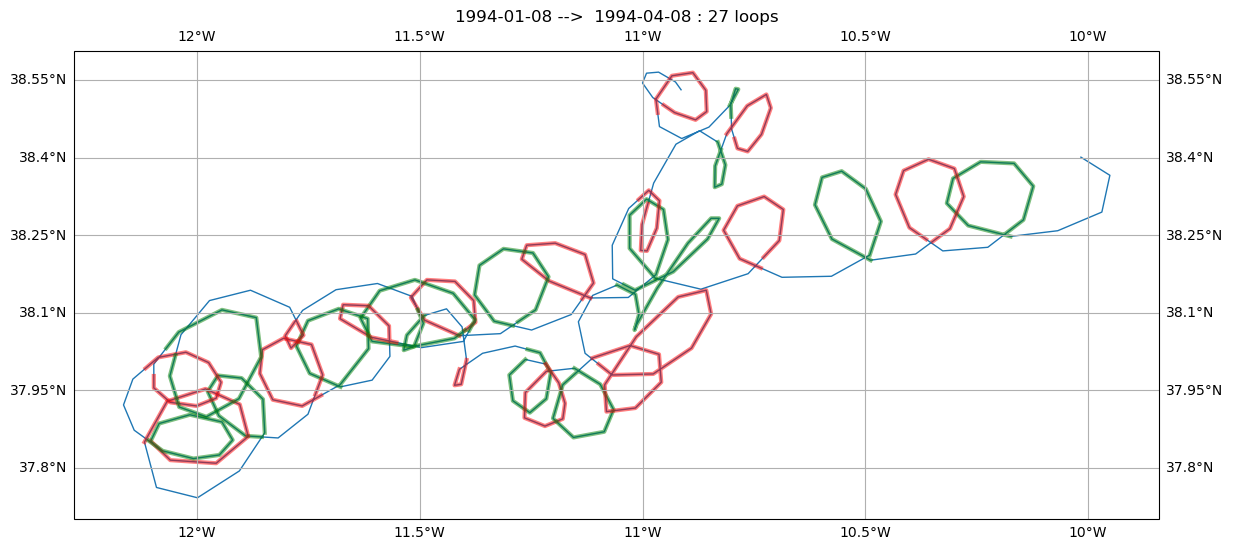

In [5]:
f=plt.figure(figsize=(14,8))
ax=f.add_subplot(111,projection=ccrs.Miller())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.plot(m5['lon'][:540],m5['lat'][:540],'-',linewidth=1,transform=ccrs.PlateCarree())

c=['g','r']
i=0
for l in loops[:30]:
    ax.plot(m5['lon'][l[0]:l[1]+1],m5['lat'][l[0]:l[1]+1],'-',color=c[i%2],linewidth=3,alpha=.5,transform=ccrs.PlateCarree())
    i+=1

ax.set_title(str(m5.dated[0].values)[0:10]+' -->  '+str(m5.dated[540].values)[0:10]+' : 27 loops')    

#ax.plot(m5['lon'][340],m5['lat'][340],'ko',markersize=10,transform=ccrs.PlateCarree())

Text(470, 2025.949581196303, '2025')

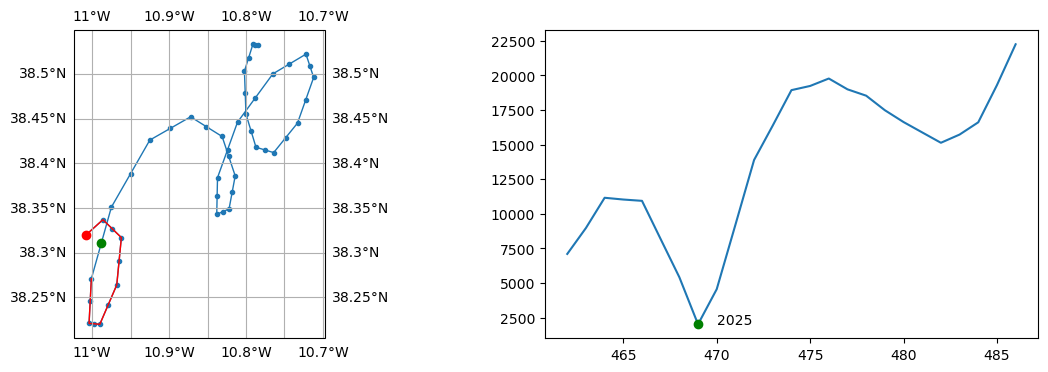

In [6]:
i=loops[25][0]
j=loops[25][1]

f=plt.figure(figsize=(14,4))
ax=f.add_subplot(121,projection=ccrs.Miller())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.plot(m5['lon'][i],m5['lat'][i],'ro',transform=ccrs.PlateCarree(),zorder=3)
ax.plot(m5['lon'][i:i+50],m5['lat'][i:i+50],'.-',linewidth=1,transform=ccrs.PlateCarree())
ax.plot(m5['lon'][i:j],m5['lat'][i:j],'r-',linewidth=1,transform=ccrs.PlateCarree())

mind=np.nanargmin(az[i,:])
ax.plot(m5['lon'][mind],m5['lat'][mind],'go',transform=ccrs.PlateCarree(),zorder=3)

ax1=f.add_subplot(122)
ax1.plot(az[i,:])
ax1.plot(mind,az[i,mind],'go')
ax1.text(mind+1,az[i,mind],s=str(int(az[i,mind])))

Text(122, 1909.2116817412575, '1909')

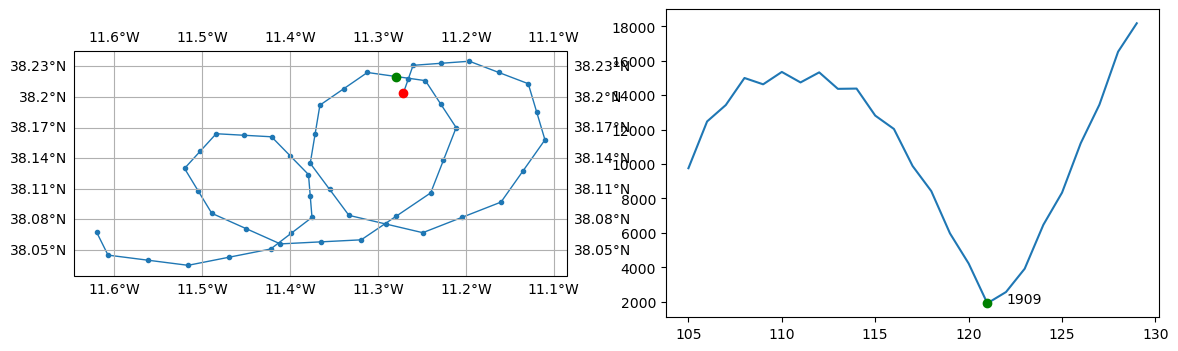

In [7]:
i=100

f=plt.figure(figsize=(14,4))
ax=f.add_subplot(121,projection=ccrs.Miller())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.plot(m5['lon'][i],m5['lat'][i],'ro',transform=ccrs.PlateCarree(),zorder=3)
ax.plot(m5['lon'][i:i+50],m5['lat'][i:i+50],'.-',linewidth=1,transform=ccrs.PlateCarree())

mind=np.nanargmin(az[i,:])
ax.plot(m5['lon'][mind],m5['lat'][mind],'go',transform=ccrs.PlateCarree(),zorder=3)

ax1=f.add_subplot(122)
ax1.plot(az[i,:])
ax1.plot(mind,az[i,mind],'go')
ax1.text(mind+1,az[i,mind],s=str(int(az[i,mind])))